In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import glob

csv_files = glob.glob('csvs_per_year/madrid_*.csv')

dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

combined_df = pd.concat(dfs)

In [3]:
# find station with the least number of NaN values
combined_df.groupby('station').count().sort_values('CO', ascending=False).head(10)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,PM25,NO,CH4
station,,,,,,,,,,,,,,,,,,
28079004,151776,0,151213,0,0,0,151273,92320,0,78520,78274,0,151311,0,0,0,64030,0
28079016,151776,0,151182,0,0,0,151290,92321,0,151131,75920,0,78497,0,0,0,64045,0
28079036,151056,0,150561,0,0,0,150508,92074,0,77309,150164,0,150563,0,0,0,63502,0
28079024,151416,137910,149779,133762,72331,148472,149782,91247,72331,149135,149058,72332,149833,148522,137898,121807,63585,4911
28079018,149760,70546,149053,70517,0,31463,148971,90657,0,149067,144079,0,149020,31441,70327,0,63334,0
28079039,148824,0,148095,0,0,0,148100,89205,0,146894,74725,0,75435,0,0,0,63924,0
28079008,139608,132088,138760,132067,0,117187,138423,79975,0,137820,135851,0,138622,117265,131656,73664,63516,5004
28079035,115656,50530,114804,50547,50407,47626,114841,56470,50530,113905,51328,50493,114523,47636,50472,0,63438,0
28079099,87648,87128,87621,87036,81779,86828,87571,87603,81841,87624,87576,81806,87619,87015,87174,60291,0,0


In [5]:
df = combined_df.loc[combined_df.station == 28079024] # Casa de Campo
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
21,2001-08-01 01:00:00,0.80,0.43,0.71,1.20,0.10,27.190001,29.700001,0.76,56.990002,114.300003,0.49,10.84,1.42,3.43,28079024,NaN,NaN,NaN
45,2001-08-01 02:00:00,0.74,0.51,0.78,1.23,0.12,36.980000,38.310001,0.78,46.939999,78.949997,0.51,11.01,1.38,3.72,28079024,NaN,NaN,NaN
69,2001-08-01 03:00:00,1.07,0.43,1.09,2.04,0.11,32.250000,33.310001,1.14,52.419998,61.790001,0.81,10.76,1.37,6.39,28079024,NaN,NaN,NaN
93,2001-08-01 04:00:00,0.81,0.42,0.92,1.65,0.11,28.740000,29.820000,0.91,55.980000,58.320000,0.67,10.49,1.37,5.14,28079024,NaN,NaN,NaN
117,2001-08-01 05:00:00,0.72,0.42,0.94,1.67,0.09,26.270000,28.290001,0.91,61.160000,51.660000,0.67,10.29,1.45,5.88,28079024,NaN,NaN,NaN


In [6]:
df.isna().sum().sort_values(ascending=True) # use SO_2, NO_2, CO, O_3, PM10

date            0
station         0
SO_2         1583
NO_2         1634
CO           1637
O_3          2281
PM10         2358
TCH          2894
NMHC         2944
BEN         13506
TOL         13518
EBE         17654
PM25        29609
NOx         60169
PXY         79084
MXY         79085
OXY         79085
NO          87831
CH4        146505
dtype: int64

In [7]:
df = df[['date','SO_2','NO_2','CO','O_3','PM10']]
df.head()

,date,SO_2,NO_2,CO,O_3,PM10
21,2001-08-01 01:00:00,10.84,27.190001,0.43,56.990002,114.300003
45,2001-08-01 02:00:00,11.01,36.980000,0.51,46.939999,78.949997
69,2001-08-01 03:00:00,10.76,32.250000,0.43,52.419998,61.790001
93,2001-08-01 04:00:00,10.49,28.740000,0.42,55.980000,58.320000
117,2001-08-01 05:00:00,10.29,26.270000,0.42,61.160000,51.660000


In [8]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date    datetime64[ns]
SO_2           float64
NO_2           float64
CO             float64
O_3            float64
PM10           float64
dtype: object

In [9]:
df = df.sort_values('date').reset_index(drop=True)
df.head()

,date,SO_2,NO_2,CO,O_3,PM10
0,2001-01-01 01:00:00,9.69,47.32,0.79,3.40,14.440000
1,2001-01-01 02:00:00,9.76,47.16,0.86,3.44,15.600000
2,2001-01-01 03:00:00,11.11,45.52,1.09,3.58,20.860001
3,2001-01-01 04:00:00,12.34,41.84,1.31,3.69,27.910000
4,2001-01-01 05:00:00,13.05,38.59,1.39,3.76,34.270000


### Cleaned file

In [4]:
# df.to_csv('df_cleaned.csv', index=False)
df = pd.read_csv('df_cleaned.csv')
df.head()

,date,SO_2,NO_2,CO,O_3,PM10
0,2001-01-01 01:00:00,9.69,47.32,0.79,3.40,14.440000
1,2001-01-01 02:00:00,9.76,47.16,0.86,3.44,15.600000
2,2001-01-01 03:00:00,11.11,45.52,1.09,3.58,20.860001
3,2001-01-01 04:00:00,12.34,41.84,1.31,3.69,27.910000
4,2001-01-01 05:00:00,13.05,38.59,1.39,3.76,34.270000


In [5]:
df.describe()

,SO_2,NO_2,CO,O_3,PM10
count,149833.000000,149782.000000,149779.000000,149135.000000,149058.000000
mean,5.876054,29.026865,0.354314,52.132650,22.510561
std,3.941970,25.910580,0.245013,34.831988,18.997092
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,0.200000,22.090000,10.000000
50%,5.280000,20.730000,0.290000,51.799999,17.200001
75%,8.000000,42.070000,0.470000,75.820000,29.020000
max,71.790001,262.500000,4.430000,220.000000,361.000000


C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\832895806.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sample.index, rotation=45, ha='right')
C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\832895806.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sample.index, rotation=45, ha='right')
C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\832895806.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sample.index, rotation=45, ha='right')
C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\832895806.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sample.index, rotation=45, ha='right')
C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\832895806.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sample.index, rotat

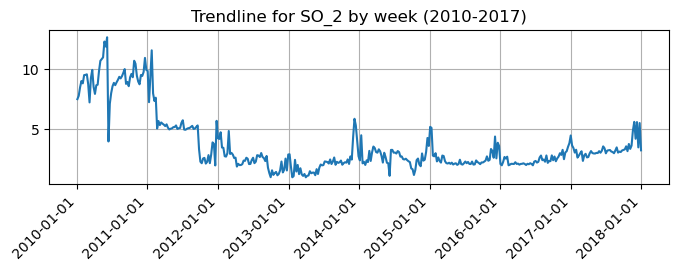

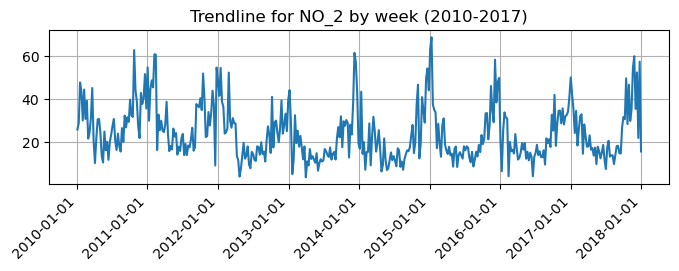

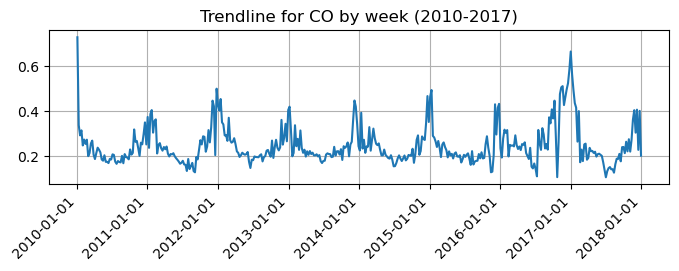

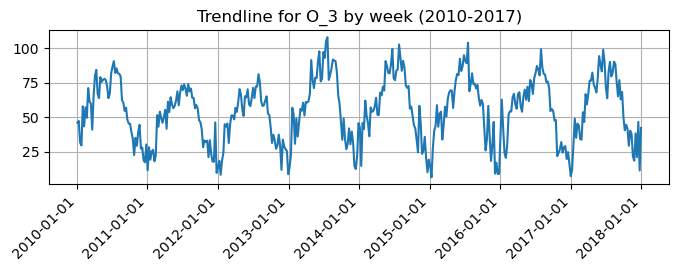

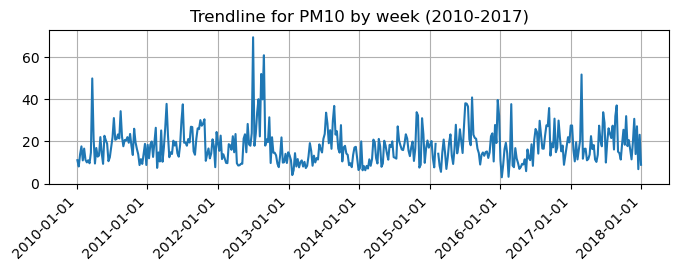

In [84]:
import matplotlib.dates as mdates

df_sample = df.query('date > "2010-01-01" and date <= "2017-12-31"').set_index('date')
df_sample.index = pd.to_datetime(df_sample.index)
df_sample = df_sample.resample('W').agg('mean')

for col in df_sample.columns:
    fig, ax = plt.subplots(figsize=(8,2))
    ax.plot(df_sample[col], label=col)
    ax.set_xticklabels(df_sample.index, rotation=45, ha='right')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # remove time
    ax.set_title(f'Trendline for {col} by week (2010-2017)')
    ax.grid()

# Prophet time series

In [85]:
df_so2 = df[['date','SO_2']]
df_so2.columns = ['ds','y']
df_so2['ds'] = pd.to_datetime(df_so2['ds'])
df_so2.dtypes

C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\2125656984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_so2['ds'] = pd.to_datetime(df_so2['ds'])


ds    datetime64[ns]
y            float64
dtype: object

In [86]:
df_so2.isna().sum()

ds       0
y     1583
dtype: int64

In [52]:
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import FunctionTransformer

# pipe = make_pipeline(FunctionTransformer(lambda x: x.interpolate('linear')))

# df_o3['y'] = pipe.fit_transform(df_o3['y'])

In [87]:
df_so2['y'] = df_so2['y'].interpolate('linear')
df_so2.isna().sum()

C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\1374050043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_so2['y'] = df_so2['y'].interpolate('linear')


ds    0
y     0
dtype: int64

In [57]:
from prophet import Prophet

### Forecasting

In [104]:
%%time

model = Prophet(interval_width=0.80)
model.fit(df_so2)

21:46:54 - cmdstanpy - INFO - Chain [1] start processing
21:51:13 - cmdstanpy - INFO - Chain [1] done processing


Wall time: 4min 35s


In [105]:
%%time

df_future = model.make_future_dataframe(periods=365, freq='D') # one year into future
df_predictions = model.predict(df_future)

Wall time: 1min 4s


In [106]:
df_predictions.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151776,2019-04-27,3.978085,-1.956632,7.978696,-0.231593,7.820692,-0.999187,-0.999187,-0.999187,-0.08321,...,0.079317,0.079317,0.079317,-0.995295,-0.995295,-0.995295,0.0,0.0,0.0,2.978897
151777,2019-04-28,3.979240,-2.744804,7.697435,-0.232468,7.856566,-1.313423,-1.313423,-1.313423,-0.08321,...,-0.239722,-0.239722,-0.239722,-0.990491,-0.990491,-0.990491,0.0,0.0,0.0,2.665818
151778,2019-04-29,3.980396,-2.286056,7.750123,-0.233343,7.891903,-1.241719,-1.241719,-1.241719,-0.08321,...,-0.174892,-0.174892,-0.174892,-0.983617,-0.983617,-0.983617,0.0,0.0,0.0,2.738677
151779,2019-04-30,3.981551,-2.130940,8.017613,-0.234218,7.927239,-0.988354,-0.988354,-0.988354,-0.08321,...,0.069576,0.069576,0.069576,-0.974720,-0.974720,-0.974720,0.0,0.0,0.0,2.993198
151780,2019-05-01,3.982707,-2.140619,8.144087,-0.235093,7.960743,-0.936572,-0.936572,-0.936572,-0.08321,...,0.110522,0.110522,0.110522,-0.963884,-0.963884,-0.963884,0.0,0.0,0.0,3.046135


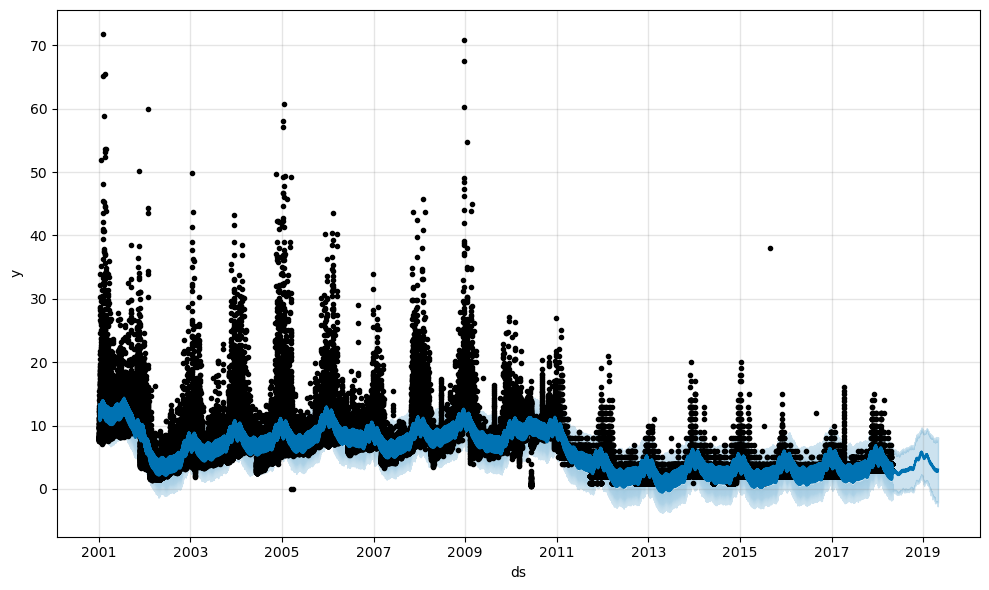

In [111]:
plot1 = model.plot(df_predictions)

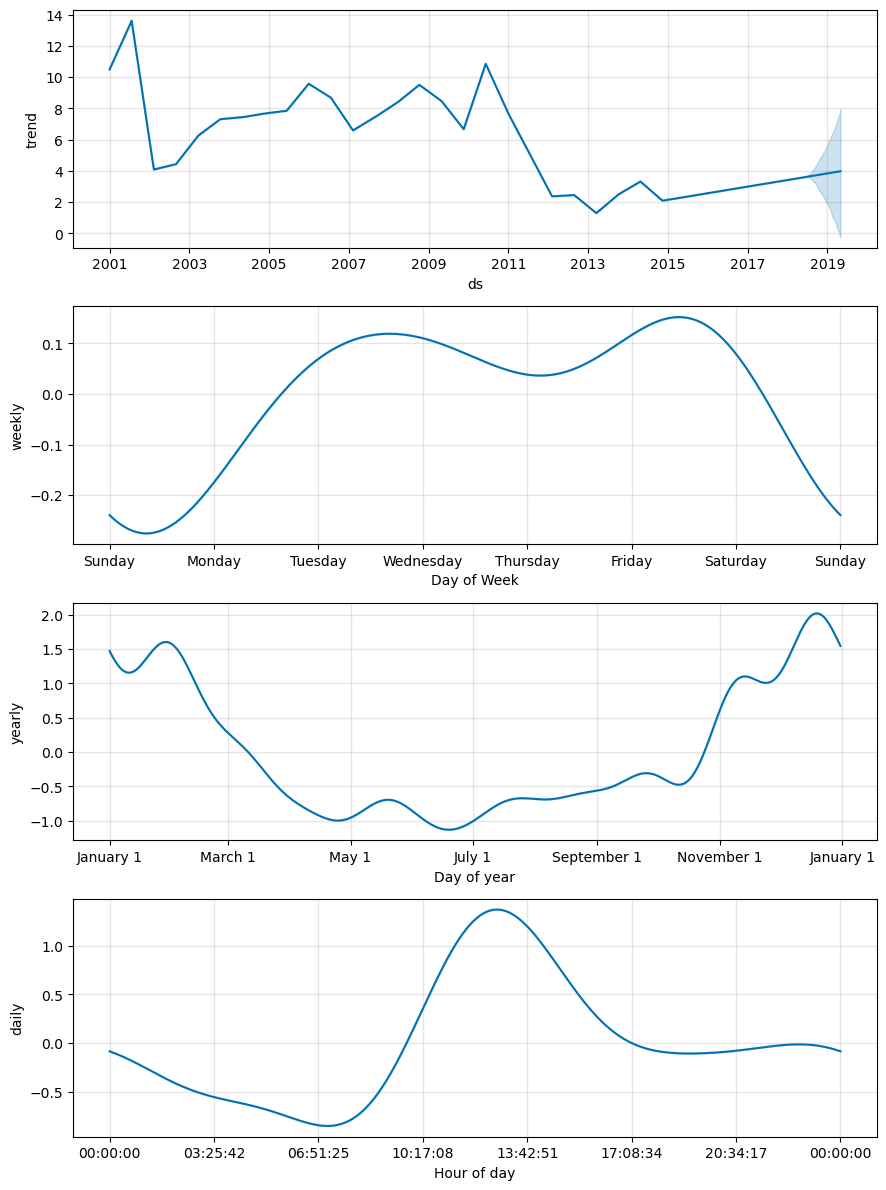

In [114]:
plot1 = model.plot_components(df_predictions)

### With train test split

In [115]:
df_train = df_so2.loc[df_so2['ds'] <= '2014-12-31']
df_test = df_so2.loc[df_so2['ds'] >= '2015-01-01']

In [116]:
%%time

model = Prophet(interval_width=0.80)
model.fit(df_train)

21:54:50 - cmdstanpy - INFO - Chain [1] start processing
22:00:50 - cmdstanpy - INFO - Chain [1] done processing


Wall time: 6min 14s


In [117]:
%%time

df_test_pred = model.predict(df_test)
df_test_pred.head()

Wall time: 9.22 s


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 00:00:00,2.523568,0.224851,6.737228,2.523568,2.523568,0.974705,0.974705,0.974705,-0.099217,...,0.036664,0.036664,0.036664,1.037258,1.037258,1.037258,0.0,0.0,0.0,3.498273
1,2015-01-01 01:00:00,2.523580,0.093218,6.777132,2.523580,2.523580,0.812086,0.812086,0.812086,-0.257173,...,0.035184,0.035184,0.035184,1.034075,1.034075,1.034075,0.0,0.0,0.0,3.335666
2,2015-01-01 02:00:00,2.523591,0.100375,6.503126,2.523591,2.523591,0.622982,0.622982,0.622982,-0.442062,...,0.034147,0.034147,0.034147,1.030897,1.030897,1.030897,0.0,0.0,0.0,3.146573
3,2015-01-01 03:00:00,2.523603,-0.366126,6.370773,2.523603,2.523603,0.474862,0.474862,0.474862,-0.586437,...,0.033576,0.033576,0.033576,1.027724,1.027724,1.027724,0.0,0.0,0.0,2.998465
4,2015-01-01 04:00:00,2.523615,-0.558199,6.273959,2.523615,2.523615,0.383069,0.383069,0.383069,-0.674978,...,0.033492,0.033492,0.033492,1.024555,1.024555,1.024555,0.0,0.0,0.0,2.906684


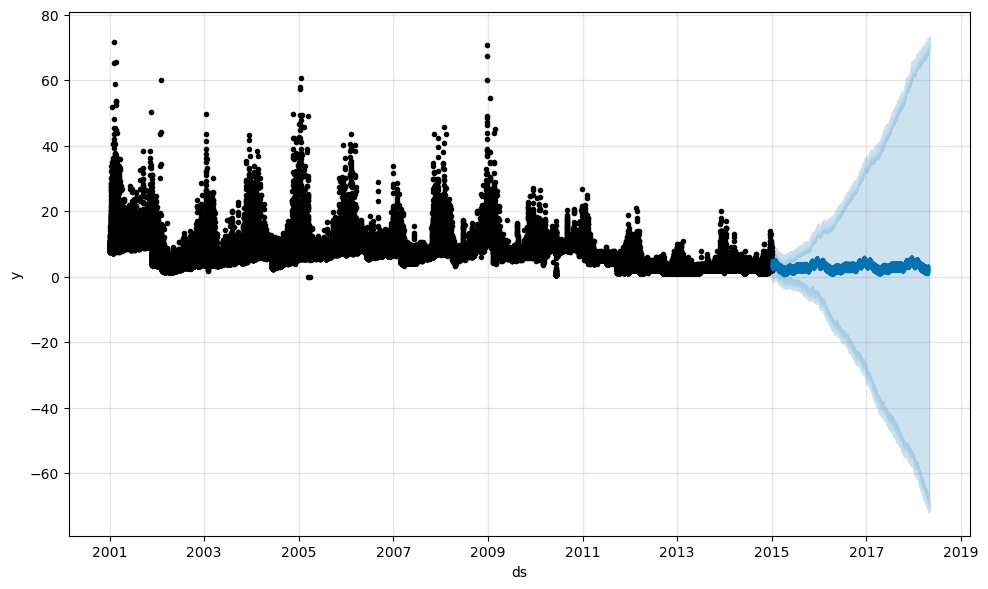

In [118]:
plot1 = model.plot(df_test_pred)

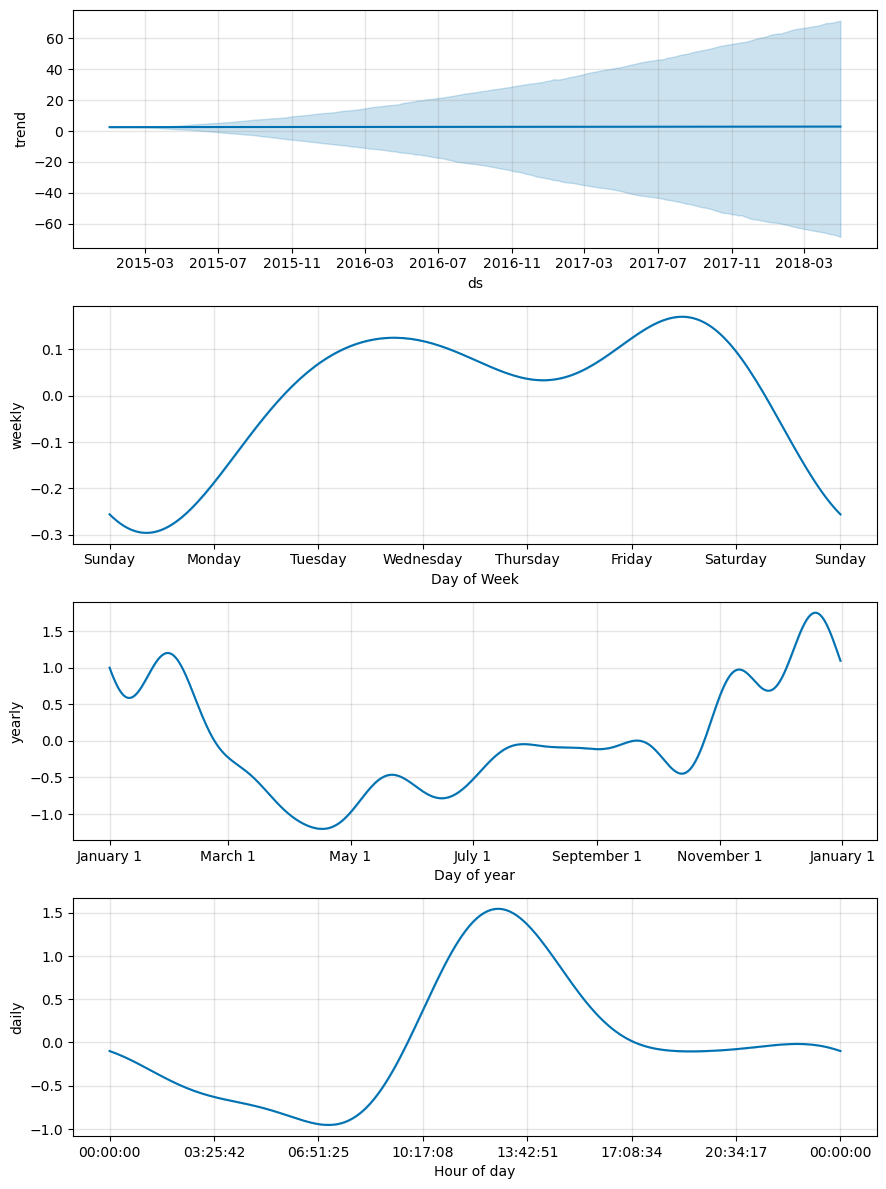

In [119]:
plot1 = model.plot_components(df_test_pred)

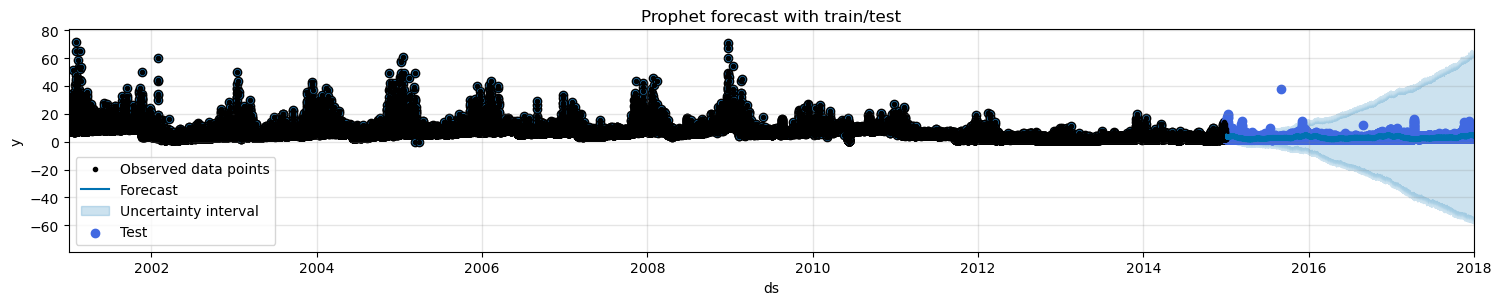

In [143]:
fig, ax = plt.subplots(figsize=(15, 3))
fig = model.plot(df_test_pred, ax=ax)
ax.scatter(df_train['ds'], df_train['y'], edgecolor='black')
ax.scatter(df_test['ds'], df_test['y'], color='royalblue', label='Test')
ax.set_xbound(lower='2001-01-01', upper='2018-01-01')
ax.set_title('Prophet forecast with train/test')
plt.legend(loc='lower left')
plt.show()

# XGBoost time series

In [141]:
from xgboost import XGBRegressor

In [195]:
# create new feature columns from date
df_so2_features = df_so2.set_index('ds')

df_so2_features['year'] = df_so2_features.index.year
df_so2_features['month'] = df_so2_features.index.month
df_so2_features['day'] = df_so2_features.index.day
df_so2_features['hour'] = df_so2_features.index.hour
df_so2_features['day_of_week'] = df_so2_features.index.day_of_week

df_so2_features

,y,year,month,day,hour,day_of_week
ds,,,,,,
2001-01-01 01:00:00,9.69,2001,1,1,1,0
2001-01-01 02:00:00,9.76,2001,1,1,2,0
2001-01-01 03:00:00,11.11,2001,1,1,3,0
2001-01-01 04:00:00,12.34,2001,1,1,4,0
2001-01-01 05:00:00,13.05,2001,1,1,5,0
...,...,...,...,...,...,...
2018-04-30 20:00:00,3.00,2018,4,30,20,0
2018-04-30 21:00:00,3.00,2018,4,30,21,0
2018-04-30 22:00:00,3.00,2018,4,30,22,0


In [196]:
X_train = df_so2_features.loc[df_so2_features['year'] <= 2014].drop('y', axis=1)
y_train = df_so2_features.loc[df_so2_features['year'] <= 2014]['y']

X_test = df_so2_features.loc[df_so2_features['year'] >= 2015].drop('y', axis=1)
y_test = df_so2_features.loc[df_so2_features['year'] >= 2015]['y']

In [197]:
%%time

xgb = XGBRegressor(n_estimators=1000, 
                   early_stopping_rounds=10, 
                   learning_rate=0.01) # when provided a eval_set, xgb will stop once rmse of val increases

xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:7.24171	validation_1-rmse:2.66487
[100]	validation_0-rmse:3.54782	validation_1-rmse:1.54264
[200]	validation_0-rmse:2.61745	validation_1-rmse:1.26514
[300]	validation_0-rmse:2.39946	validation_1-rmse:1.20140
[400]	validation_0-rmse:2.30980	validation_1-rmse:1.18290
[444]	validation_0-rmse:2.28313	validation_1-rmse:1.17855
Wall time: 24.4 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

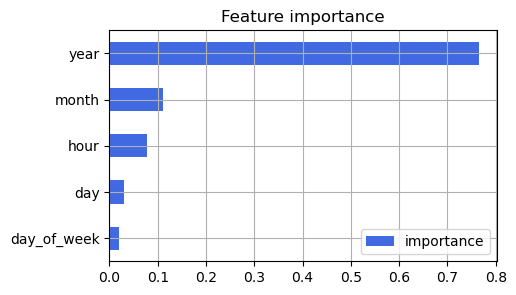

In [198]:
# xgb.feature_importances_
# xgb.feature_names_in_

fi = pd.DataFrame(data=xgb.feature_importances_, 
                  index=xgb.feature_names_in_, 
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', color='royalblue', title='Feature importance', figsize=(5,3))
plt.grid()

In [199]:
y_pred = xgb.predict(X_test)

In [208]:
df_train = df_so2_features.loc[df_so2_features['year'] <= 2014]
df_test = df_so2_features.loc[df_so2_features['year'] >= 2015]

df_test['y_pred'] = y_pred
df_test.head()

C:\Users\gunna\AppData\Local\Temp\ipykernel_9188\3840188677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['y_pred'] = y_pred


,y,year,month,day,hour,day_of_week,y_pred
ds,,,,,,,
2015-01-01 00:00:00,5.0,2015,1,1,0,3,2.621022
2015-01-01 01:00:00,4.0,2015,1,1,1,3,2.592252
2015-01-01 02:00:00,4.0,2015,1,1,2,3,2.558589
2015-01-01 03:00:00,4.0,2015,1,1,3,3,2.482548
2015-01-01 04:00:00,4.0,2015,1,1,4,3,2.372410


In [207]:
df_merge = pd.concat([df_train, df_test])
df_merge

,y,year,month,day,hour,day_of_week,y_pred
ds,,,,,,,
2001-01-01 01:00:00,9.69,2001,1,1,1,0,NaN
2001-01-01 02:00:00,9.76,2001,1,1,2,0,NaN
2001-01-01 03:00:00,11.11,2001,1,1,3,0,NaN
2001-01-01 04:00:00,12.34,2001,1,1,4,0,NaN
2001-01-01 05:00:00,13.05,2001,1,1,5,0,NaN
...,...,...,...,...,...,...,...
2018-04-30 20:00:00,3.00,2018,4,30,20,0,2.595429
2018-04-30 21:00:00,3.00,2018,4,30,21,0,2.595429
2018-04-30 22:00:00,3.00,2018,4,30,22,0,2.595429


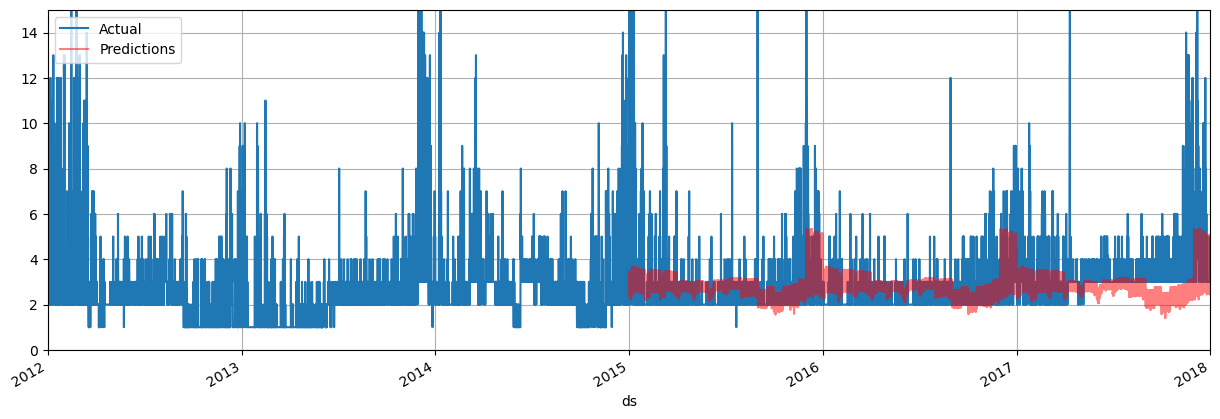

In [229]:
fig, ax = plt.subplots(figsize=(15, 5))
df_merge['y'].plot()
df_merge['y_pred'].plot(color='red', alpha=0.5)
ax.set_xbound(lower='2012-01-01', upper='2018-01-01')
ax.set_ybound(lower=0, upper=15)
plt.legend(['Actual','Predictions'], loc='upper left')
plt.grid()

In [236]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_test['y'], df_test['y_pred'], squared=False)
rmse

1.177884261428751